## The Importance of Reproducibility in Data Science

### Foundations for Trustworthy and Ethical AI

---

**Why Reproducibility Matters:**
- Ensures consistent results across runs, facilitating peer review and validation.
- Critical for maintaining the integrity of scientific findings in the face of stochastic processes.

**Sources of Non-Reproducibility:**
- Random number generation in model initialization and training (e.g., `random_state`).
- Variations in data preprocessing and feature engineering steps.
- Random number generation in model evaluation (e.g. train-test split)
- Non-deterministic hardware and parallel computing effects.

**The Industry Perspective:**
- In trading algorithms, reproducibility ensures that strategies perform consistently under the same conditions.
- Essential for auditing and compliance in sensitive sectors like finance and healthcare.

---

## Reproducibility: Auditability and Compliance

### Meeting Regulatory Standards in the Oil & Gas Industry

---

**Auditability in Financial Reporting:**
- **Case Study:** Accurate reporting of oil reserves and valuation.
- **Reproducibility Importance:** Regulatory bodies, such as the SEC, may require companies to reproduce their reserve estimates to validate reported figures.
- **Outcome:** Ensuring that reserve estimation models can be rerun with the same inputs to verify results guarantees compliance and avoids legal or financial penalties.

---

**Compliance in Environmental Regulations:**
- **Case Study:** Modeling emissions and environmental impact for regulatory reporting.
- **Reproducibility Importance:** Environmental agencies may review the models and data used to ensure compliance with regulations such as the Clean Air Act.
- **Outcome:** Reproducible models ensure that firms can consistently demonstrate adherence to environmental standards and can help defend against claims of non-compliance.

---

## Reproducibility: Building Trust in AI

### Gaining Stakeholder Confidence Through Consistent Results

---

**Predictive Maintenance:**
- **Case Study:** Using AI to predict equipment failures and schedule maintenance.
- **Trust Importance:** Operators must trust the AI system's predictions to make costly preemptive maintenance decisions.
- **Outcome:** Reproducible results enhance trust in the system's reliability, reducing skepticism and promoting adoption of AI-driven maintenance strategies.

---

**Investment Strategies:**
- **Case Study:** AI-driven models for predicting commodity prices and guiding investment decisions.
- **Trust Importance:** Investment stakeholders require transparent and reliable predictions to place significant funds on model-based strategies.
- **Outcome:** Reproducibility ensures that investment models are robust and can be trusted over time, which is essential for stakeholder buy-in and long-term strategic planning.

---

## Streamlining Reproducibility with sklearn Pipelines

### Building Robust and Transparent Data Science Workflows

---

**sklearn Pipeline:**
- A tool that sequentially applies a list of transforms and a final estimator.
- Centralizing the data flow makes the process transparent and reproducible.

**Setting Up for Reproducibility:**
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
```
- The `random_state` ensures that the stochastic parts of the process are reproducible.

**Industry Connection:**
- Pipelines enable commodity trading firms to systematically back-test trading strategies with consistent preprocessing steps.



# Reproducibility

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/income_data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [4]:
cat_cols = ['sex', 'education', 'race']
cont_cols = ['age', 'hours-per-week']
features = cat_cols + cont_cols
target = 'target'

## Everything goes into a Pipeline

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [6]:
cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', min_frequency=0.05, handle_unknown='infrequent_if_exist'))
])

In [7]:
cont_trans = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [8]:
feat_trans = ColumnTransformer(transformers=[
    ('categorical', cat_trans, cat_cols),
    ('continuous', cont_trans, cont_cols)
])

In [11]:
def mk_neighbours(n_neighbours=20):
    return Pipeline(steps=[
        ('transform', feat_trans),
        ('classifier', KNeighborsClassifier(n_neighbors=n_neighbours))
    ])

In [12]:
mk_neighbours(20)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.05))]),
                                                  ['sex', 'education', 'race']),
                                                 ('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hours-per-week'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=20))])

## Model evaluation

In [13]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [15]:
def mk_score(n_neigh):
    Xtr, Xte, ytr, yte = train_test_split(df[features], df[target])
    return sklearn.metrics.accuracy_score(yte,
                mk_neighbours(n_neigh).fit(Xtr, ytr).predict(Xte))

In [16]:
mk_score(5)

0.7655079228595996

In [17]:
mk_score(50)

0.7985505466158949

In [18]:
mk_score(50)

0.7948654956393564

<Axes: ylabel='Frequency'>

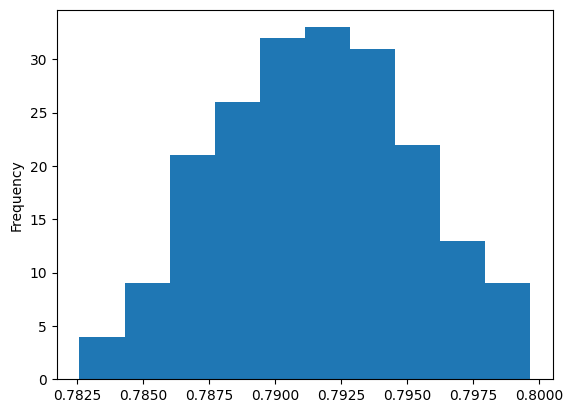

In [19]:
pd.Series([mk_score(20) for _ in range(200)]).plot.hist()

## Random seeds for models

In [25]:
def repr_score(n_neigh, seed=123):
    Xtr, Xte, ytr, yte = train_test_split(df[features], df[target],
                                          random_state=seed) # same for e.g. random forest
    return sklearn.metrics.accuracy_score(yte,
                mk_neighbours(n_neigh).fit(Xtr, ytr).predict(Xte))

In [24]:
[repr_score(10) for _ in range(10)]

[0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973,
 0.7892150841419973]

## "Global" Random State

In [26]:
import numpy as np

In [31]:
def seed_score():
    np.random.seed(123)
    return mk_score(15)
[seed_score() for _ in range(5)]

[0.7910576096302665,
 0.7910576096302665,
 0.7910576096302665,
 0.7910576096302665,
 0.7910576096302665]

In [32]:
np.random.seed(123)
[mk_score(15) for _ in range(5)]

[0.7910576096302665,
 0.7883552389141383,
 0.7922859599557794,
 0.7924087949883307,
 0.7949883306719077]

In [33]:
np.random.seed(123)
[mk_score(15) for _ in range(5)]

[0.7910576096302665,
 0.7883552389141383,
 0.7922859599557794,
 0.7924087949883307,
 0.7949883306719077]

In [35]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(mk_neighbours(10), df[features], df[target])

array([0.78381698, 0.78439803, 0.79284398, 0.78470516, 0.78439803])

In [39]:
cross_val_score(mk_neighbours(10), df[features], df[target])

array([0.78381698, 0.78439803, 0.79284398, 0.78470516, 0.78439803])

# Anonymity

---

## Ensuring Anonymity Through Randomization

### The Balance Between Privacy and Data Utility

---

**Privacy in Practice:**
- Anonymity is crucial when handling sensitive data, such as customer or proprietary information.
- Introducing randomness is a key mechanism to achieve privacy (e.g., Differential Privacy).

**Reproducibility and Anonymity:**
- Controlling the source of randomness ensures that privacy guarantees are consistent and verifiable.
- Allows for the same anonymization process to be reproduced for audits or quality checks.

---

## Implementing Randomization Mechanisms

### Introduction to Differential Privacy in sklearn

---

**Differential Privacy Basics:**
- Formal framework to quantify and control the privacy loss from data releases.
- Adds noise to the data or queries to mask the presence of individual records.

## Privacy-Preserving Randomization of Binary Variables

### Implementing Controlled Noise for Data Anonymization

---

**Random Response Technique:**
- **Objective:** To anonymize a binary variable (e.g., presence of a sensitive attribute) while preserving the ability to estimate population characteristics.
- **Mechanism:** With probability `θ`, a random answer (0 or 1) is provided instead of the true value.

**Implementation:**
- Let `X` be the true binary variable and `Y` be the reported variable.
- The reporting rule is defined as:

```plaintext
Y = {
    X with probability (1 - θ),
    random binary (0 or 1) with probability θ
}
```

**Estimation of True Proportions:**
- The probability of observing `Y=1` can be expressed as:
  
```plaintext
P(Y=1) = P(X=1)*(1-θ) + θ/2
```

- Given the observed proportion `P(Y=1)`, the true proportion `P(X=1)` can be estimated by solving the above equation.

**Industry Application:**
- In employee surveys, this technique could anonymize responses to sensitive questions, such as whistleblowing or compliance issues, while allowing the company to estimate the true prevalence of the concerns.

---

## Industry Relevance of Privacy-Preserving Techniques

### Case Study: Secure Trading Models

---

**Challenges in Commodity Trading:**
- Trading models often use sensitive information that could reveal strategic positions or customer data.
- Ensuring privacy while maintaining model accuracy is critical for competitive advantage.

**Privacy-Preserving Pipelines:**
- Integrate differential privacy mechanisms into the preprocessing steps of trading models.
- Evaluate trade-offs between privacy (level of noise) and utility (model accuracy).

**Business Impact:**
- By adopting privacy-preserving techniques, firms protect sensitive data while still benefiting from advanced analytics.
- Enhances trust with customers and stakeholders, aligning with responsible data science practices.


# Privacy: Randomization

In [40]:
values = np.random.choice([0, 1], 10_000)

In [41]:
values.mean()

0.4958

In [42]:
def randomise(a, theta):
    coins = np.random.choice([True, False], p=(theta, 1-theta), size=a.shape)
    noise = np.random.choice([0, 1], size=a.shape)
    response = np.array(a)
    response[~coins] = noise[~coins]
    return response

In [43]:
values[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [44]:
randomise(values, 0.8)[:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [45]:
randomise(values, 0.8).mean()

0.4909

In [46]:
vals = np.random.choice([0, 1], 10_000, p=(0.2, 0.8))
vals.mean()

0.8014

In [47]:
randomise(vals, 0.5).mean()

0.6495

In [48]:
0.8*0.5 + 0.25

0.65

## Use random mechanism in a model

In [49]:
from sklearn.preprocessing import FunctionTransformer

In [52]:
df['education'].isin([' Masters', ' Bachelors'])*1

0        1
1        1
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: education, Length: 32561, dtype: int64

In [53]:
higher_ed = [' Masters', ' Bachelors', ' Doctorate', ' Prof-school']

def mk_randomised_pipeline(theta):
    return Pipeline(steps=[
        ('higher-ed', FunctionTransformer(lambda x: x.isin(higher_ed)*1)),
        ('randomise', FunctionTransformer(randomise, kw_args={'theta': theta}))
    ])

In [57]:
def feat_transform(theta):
    return ColumnTransformer(transformers=[
        ('randomise_ed', mk_randomised_pipeline(theta), ['education']),
        ('age-hours', FunctionTransformer(), ['age', 'hours-per-week'])
    ])

def rand_model(theta, neighbours):
    return Pipeline(steps=[
        ('feature_processing', feat_transform(theta)),
        ('classifier', KNeighborsClassifier(n_neighbors=neighbours))
    ])

In [58]:
rand_model(0.5, 15).fit(df, df[target])

Pipeline(steps=[('feature_processing',
                 ColumnTransformer(transformers=[('randomise_ed',
                                                  Pipeline(steps=[('higher-ed',
                                                                   FunctionTransformer(func=<function mk_randomised_pipeline.<locals>.<lambda> at 0x14787b9c0>)),
                                                                  ('randomise',
                                                                   FunctionTransformer(func=<function randomise at 0x1406d09a0>,
                                                                                       kw_args={'theta': 0.5}))]),
                                                  ['education']),
                                                 ('age-hours',
                                                  FunctionTransformer(),
                                                  ['age', 'hours-per-week'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=15))])

In [59]:
thetas = np.linspace(0.2, 1.0, 10)
thetas

array([0.2       , 0.28888889, 0.37777778, 0.46666667, 0.55555556,
       0.64444444, 0.73333333, 0.82222222, 0.91111111, 1.        ])

In [60]:
scores = [cross_val_score(rand_model(theta, 15), df, df[target]) for theta in thetas]

In [61]:
scores

[array([0.75587287, 0.75859951, 0.74861794, 0.75476044, 0.75230344]),
 array([0.75433748, 0.75337838, 0.75890663, 0.75184275, 0.75076781]),
 array([0.76001842, 0.75414619, 0.75660319, 0.75967445, 0.75752457]),
 array([0.76124674, 0.75721744, 0.76228501, 0.76704545, 0.76335995]),
 array([0.76600645, 0.76167076, 0.77042383, 0.76366708, 0.75844595]),
 array([0.76692768, 0.77119165, 0.76566339, 0.77027027, 0.76827396]),
 array([0.77399048, 0.77364865, 0.77564496, 0.77364865, 0.7664312 ]),
 array([0.77306925, 0.77625921, 0.77103808, 0.7767199 , 0.77042383]),
 array([0.78136036, 0.78086609, 0.77702703, 0.78485872, 0.78040541]),
 array([0.78688776, 0.78301597, 0.78316953, 0.79054054, 0.78301597])]

<Axes: >

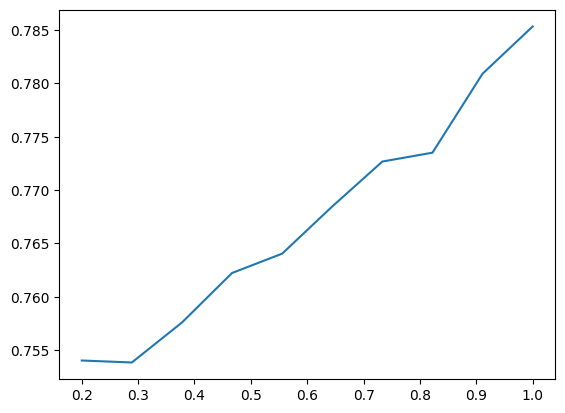

In [62]:
pd.Series([s.mean() for s in scores], index=thetas).plot.line()